In [6]:
%%bash
strace -tt -T -r -y -o logs/mmarrays.st python src/mmarrays.py 100000

Data size = 819.200 MB
Chunk size = 0.800 MB


In [7]:
from strace_miner.views.v1 import IOMiner

In [8]:
io_calls = ['read','write','mmap','openat']
sta = IOMiner(["logs/mmarrays.st",],io_calls)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()

CSV log path: logs/mmarrays.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [9]:
sta.summaries[list(sta.summaries.keys())[0]]

,call,duration,percent_total,percent_sys
0,Total,3.624584,100.000000,-1.000000
1,Sys time,1.721786,47.502996,100.000000
2,IO time,1.310282,36.149859,76.100166
3,Remaining sys time,0.411504,11.353137,23.899834
4,mmap,0.032077,0.884984,1.863007
5,openat,0.586412,16.178739,34.058356
6,read,0.068125,1.879526,3.956647
7,write,0.623668,17.206609,36.222155


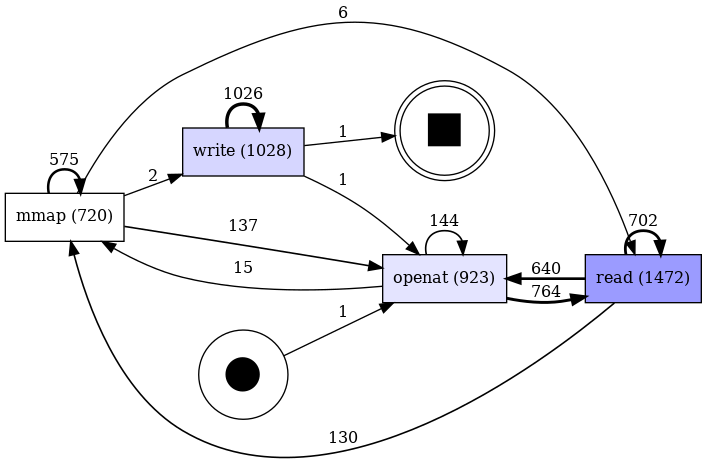

In [10]:
sta.view_dfg()